#importing libraries 

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#first and foremost we are reading the data
edu_inp = pd.read_csv("leads.csv")
edu_inp.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# understanding the data 

In [ ]:
edu_inp.shape

(9240, 37)

In [ ]:
edu_inp.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [ ]:
edu_inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

as we can see there are 7 numerical columns and 30 columns are having categrical variables

# cleaning the data

as we can see there are some columns with same and redundant value so it is better to drop those columns

going to drop the columns

In [ ]:
redundant_cols=['Prospect ID','Lead Number','Country','I agree to pay the amount through cheque',
          'A free copy of Mastering The Interview','City']

edu_inp1=edu_inp.drop(redundant_cols,1)
edu_inp1

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Select,...,Interested in other courses,Low in Relevance,No,No,Select,02.Medium,02.Medium,15.0,15.0,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,Select,...,Ringing,NaN,No,No,Select,02.Medium,02.Medium,15.0,15.0,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,...,Will revert after reading the email,Might be,No,No,Potential Lead,02.Medium,01.High,14.0,20.0,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Media and Advertising,...,Ringing,Not Sure,No,No,Select,02.Medium,01.High,13.0,17.0,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,Select,...,Will revert after reading the email,Might be,No,No,Select,02.Medium,01.High,15.0,18.0,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,...,Will revert after reading the email,High in Relevance,No,No,Potential Lead,02.Medium,01.High,15.0,17.0,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,...,wrong number given,Might be,No,No,Potential Lead,02.Medium,01.High,14.0,19.0,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,...,invalid number,Not Sure,No,No,Potential Lead,02.Medium,01.High,13.0,20.0,SMS Sent
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,...,NaN,NaN,No,No,NaN,02.Medium,02.Medium,15.0,16.0,SMS Sent


In [ ]:
edu_inp1.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,...,Interested in other courses,Low in Relevance,No,No,Select,02.Medium,02.Medium,15.0,15.0,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,...,Ringing,NaN,No,No,Select,02.Medium,02.Medium,15.0,15.0,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,Will revert after reading the email,Might be,No,No,Potential Lead,02.Medium,01.High,14.0,20.0,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,Ringing,Not Sure,No,No,Select,02.Medium,01.High,13.0,17.0,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,...,Will revert after reading the email,Might be,No,No,Select,02.Medium,01.High,15.0,18.0,Modified


we can see here that select word present in different columns means those haven't been selected hence we will replace those

In [ ]:
#we need to create a new for loop and required columns are appended into new upcoming list
item = list(edu_inp1.columns)
testlist=["Select"]
text=[]
for j in range(len(item)):
    if len(edu_inp1[item[j]].isin(testlist).unique())>1:
        text.append(item[j])
text

['Specialization', 'How did you hear about X Education', 'Lead Profile']

we can see here that these 4 column contains select lable

In [ ]:
#we are now copying columns in separate dataframes
inp0=pd.DataFrame(edu_inp1['Specialization'])
inp1=pd.DataFrame(edu_inp1['How did you hear about X Education'])
inp2=pd.DataFrame(edu_inp1['Lead Profile'])

In [ ]:
#we are now going to replace select lable with  nAn values

In [ ]:
inp0=inp0.replace(inp0.loc[inp0['Specialization']=='Select'],value=np.nan)
inp1=inp1.replace(inp1.loc[inp1['How did you hear about X Education']=='Select'],value=np.nan)
inp2=inp2.replace(inp2.loc[inp2['Lead Profile']=='Select'],value=np.nan)

In [ ]:
# After replacing in temporary dataframe, we update our original dataset with new set of data from dataset 

edu_inp1['Specialization']=inp0['Specialization']
edu_inp1['How did you hear about X Education']=inp1['How did you hear about X Education']
edu_inp1['Lead Profile']=inp2['Lead Profile']

# now we will replace select with null values

In [ ]:
round(edu_inp1.isnull().sum()/len(edu_inp1)*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

we can remove the column which have more than 30 percent missing values

In [ ]:
# now we are dropping columns which are having more than 30  percent of missing values

drop_columns=edu_inp1.isnull().sum()
drop_columns=drop_columns[drop_columns.values/len(edu_inp1)>0.30]
len(drop_columns)

9

In [ ]:
# Dropping 9 columns and checking the remaining columns for missing values

drop_columns1=list(drop_columns.keys())
edu_inp1=edu_inp1.drop(drop_columns1,1)  
round(edu_inp1.isnull().sum()/len(edu_inp1)*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
Receive Mo

we have remove 9 columns which had more than 30 percent of missing values

0 is coming , hence we will replace missing values with 0

In [ ]:
edu_inp1['TotalVisits'].value_counts().head(5)

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: TotalVisits, dtype: int64

In [ ]:
edu_inp1['Last Activity'].value_counts().head(5)

Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     640
Converted to Lead           428
Name: Last Activity, dtype: int64

0 is having highest number of occurences we will impute missing values with 0

In [ ]:
edu_inp1['What is your current occupation'].value_counts().head(5)

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Name: What is your current occupation, dtype: int64

unemployed is having largest number of occurences so we will replace missing values with unemployed

In [ ]:
edu_inp1['What matters most to you in choosing a course'].value_counts().head(5)

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

better career prospects is having highest number of occuerences so we will replace missing values with better career prospects

In [ ]:
#now imputing those missing values with highest number of occurences
missing_values={'Lead Source':'Google','TotalVisits':'0.0','Page Views Per Visit':'0.0','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed','What matters most to you in choosing a course':'Better Career Prospects'}

edu_inp1=edu_inp1.fillna(value=missing_values)

In [ ]:
edu_inp1.isnull().sum()  # checking for the missing values after imputing values to the missing area

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our Courses           0
Update me on Supply Chain Conte

now we found out that missing values have been treated so we can now go for the next analysis

In [ ]:
edu_inp1['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
welearnblog_Home        1
blog                    1
testone                 1
youtubechannel          1
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
Name: Lead Source, dtype: int64

we can observe here that there are two types one is "Google" and another is "google" and hence this needs to be treated

for this purpose lambda function is highly useful which can be used in columns

In [ ]:
edu_inp1['Lead Source']=edu_inp1['Lead Source'].apply(lambda x:x.capitalize())

edu_inp1['Lead Source'].value_counts()

Google               2909
Direct traffic       2543
Olark chat           1755
Organic search       1154
Reference             534
Welingak website      142
Referral sites        125
Facebook               55
Bing                    6
Click2call              4
Live chat               2
Social media            2
Press_release           2
Nc_edm                  1
Welearnblog_home        1
Welearn                 1
Pay per click ads       1
Blog                    1
Youtubechannel          1
Testone                 1
Name: Lead Source, dtype: int64

so this problem has been treated and hence total count of google is 2909

now it looks that data cleaning has been done and it is in good shape

# data transformation

In [ ]:
edu_inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    9240 non-null   object
 1   Lead Source                                    9240 non-null   object
 2   Do Not Email                                   9240 non-null   object
 3   Do Not Call                                    9240 non-null   object
 4   Converted                                      9240 non-null   int64 
 5   TotalVisits                                    9240 non-null   object
 6   Total Time Spent on Website                    9240 non-null   int64 
 7   Page Views Per Visit                           9240 non-null   object
 8   Last Activity                                  9240 non-null   object
 9   What is your current occupation                9240 non-null   

now we are going to assign numerical variables to categories with "yes to 1" and "no to 0"

In [ ]:

categorization={"No":0,"Yes":1}    # creating dictionary for two categories

# for Column 'Do Not Email'

edu_inp1['Do Not Email']=edu_inp1['Do Not Email'].map(categorization)

# for Column 'Do Not Call'

edu_inp1['Do Not Call']=edu_inp1['Do Not Call'].map(categorization)

# for Column 'Search'

edu_inp1['Search']=edu_inp1['Search'].map(categorization)

# for Column 'Magazine'

edu_inp1['Magazine']=edu_inp1['Magazine'].map(categorization)

# for Column 'Newspaper Article'

edu_inp1['Newspaper Article']=edu_inp1['Newspaper Article'].map(categorization)

# for Column 'X Education Forums'

edu_inp1['X Education Forums']=edu_inp1['X Education Forums'].map(categorization)

# for Column 'Newspaper'

edu_inp1['Newspaper']=edu_inp1['Newspaper'].map(categorization)
# Column 'Digital Advertisement'

edu_inp1['Digital Advertisement']=edu_inp1['Digital Advertisement'].map(categorization)

# for Column 'Through Recommendations'

edu_inp1['Through Recommendations']=edu_inp1['Through Recommendations'].map(categorization)

# for Column 'Receive More Updates About Our Courses'

edu_inp1['Receive More Updates About Our Courses']=edu_inp1['Receive More Updates About Our Courses'].map(categorization)

# for Column 'Update me on Supply Chain Content'

edu_inp1['Update me on Supply Chain Content']=edu_inp1['Update me on Supply Chain Content'].map(categorization)

# for Column 'Get updates on DM Content'

edu_inp1['Get updates on DM Content']=edu_inp1['Get updates on DM Content'].map(categorization)

In [ ]:
edu_inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    9240 non-null   object
 1   Lead Source                                    9240 non-null   object
 2   Do Not Email                                   9240 non-null   int64 
 3   Do Not Call                                    9240 non-null   int64 
 4   Converted                                      9240 non-null   int64 
 5   TotalVisits                                    9240 non-null   object
 6   Total Time Spent on Website                    9240 non-null   int64 
 7   Page Views Per Visit                           9240 non-null   object
 8   Last Activity                                  9240 non-null   object
 9   What is your current occupation                9240 non-null   

now creating a dummy variable and dropping first level

In [ ]:
dummy=pd.get_dummies(edu_inp1[['Lead Origin','Lead Source','Last Activity','What is your current occupation',
                             'What matters most to you in choosing a course','Last Notable Activity']],drop_first=True)
edu_inp1=pd.concat([edu_inp1,dummy],axis=1)

edu_inp1.shape

(9240, 83)

now we are trying to remove duplicate columns and then finding shape

In [ ]:
duplicates=['Lead Origin','Lead Source','Last Activity','What is your current occupation',
            'What matters most to you in choosing a course','Last Notable Activity']


edu_inp1=edu_inp1.drop(duplicates,1)

edu_inp1.shape

(9240, 77)

In [ ]:
# Dropping redundant variables

redundant=['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','Magazine']

edu_inp1=edu_inp1.drop(redundant,1)

In [ ]:
#converting some categorical into object
#edu_inp1[['TotalVisits','Page Views Per Visit']]=edu_inp1[['TotalVisits','Page Views Per Visit']].convert_objects(convert_numeric=True)
edu_inp1["TotalVisits"] = edu_inp1.TotalVisits.astype(float)


In [ ]:
edu_inp1["Page Views Per Visit"] = edu_inp1["Page Views Per Visit"].astype(float)

In [ ]:
edu_inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 73 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             9240 non-null   int64  
 1   Do Not Call                                                              9240 non-null   int64  
 2   Converted                                                                9240 non-null   int64  
 3   TotalVisits                                                              9240 non-null   float64
 4   Total Time Spent on Website                                              9240 non-null   int64  
 5   Page Views Per Visit                                                     9240 non-null   float64
 6   Search                                                                  

it can be seen now that all variables are numericals

# now we are going to check for outliers

In [ ]:
round(edu_inp1.describe(percentiles=[0.15,0.35,0.55,0.75,0.95]),2)

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,...,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00
mean,0.08,0.00,0.39,3.39,487.70,2.33,0.00,0.00,0.00,0.00,...,0.00,0.00,0.37,0.02,0.03,0.00,0.24,0.00,0.01,0.00
std,0.27,0.01,0.49,4.84,548.02,2.16,0.04,0.01,0.01,0.01,...,0.01,0.04,0.48,0.14,0.18,0.01,0.42,0.06,0.07,0.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
15%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
35%,0.00,0.00,0.00,2.00,98.00,1.50,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,3.00,248.00,2.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
55%,0.00,0.00,0.00,3.00,305.00,2.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,1.00,5.00,936.00,3.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
95%,1.00,0.00,1.00,10.00,1562.00,6.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


there are two outliers we can see after 95 percentile in total visit column and page views per visit 


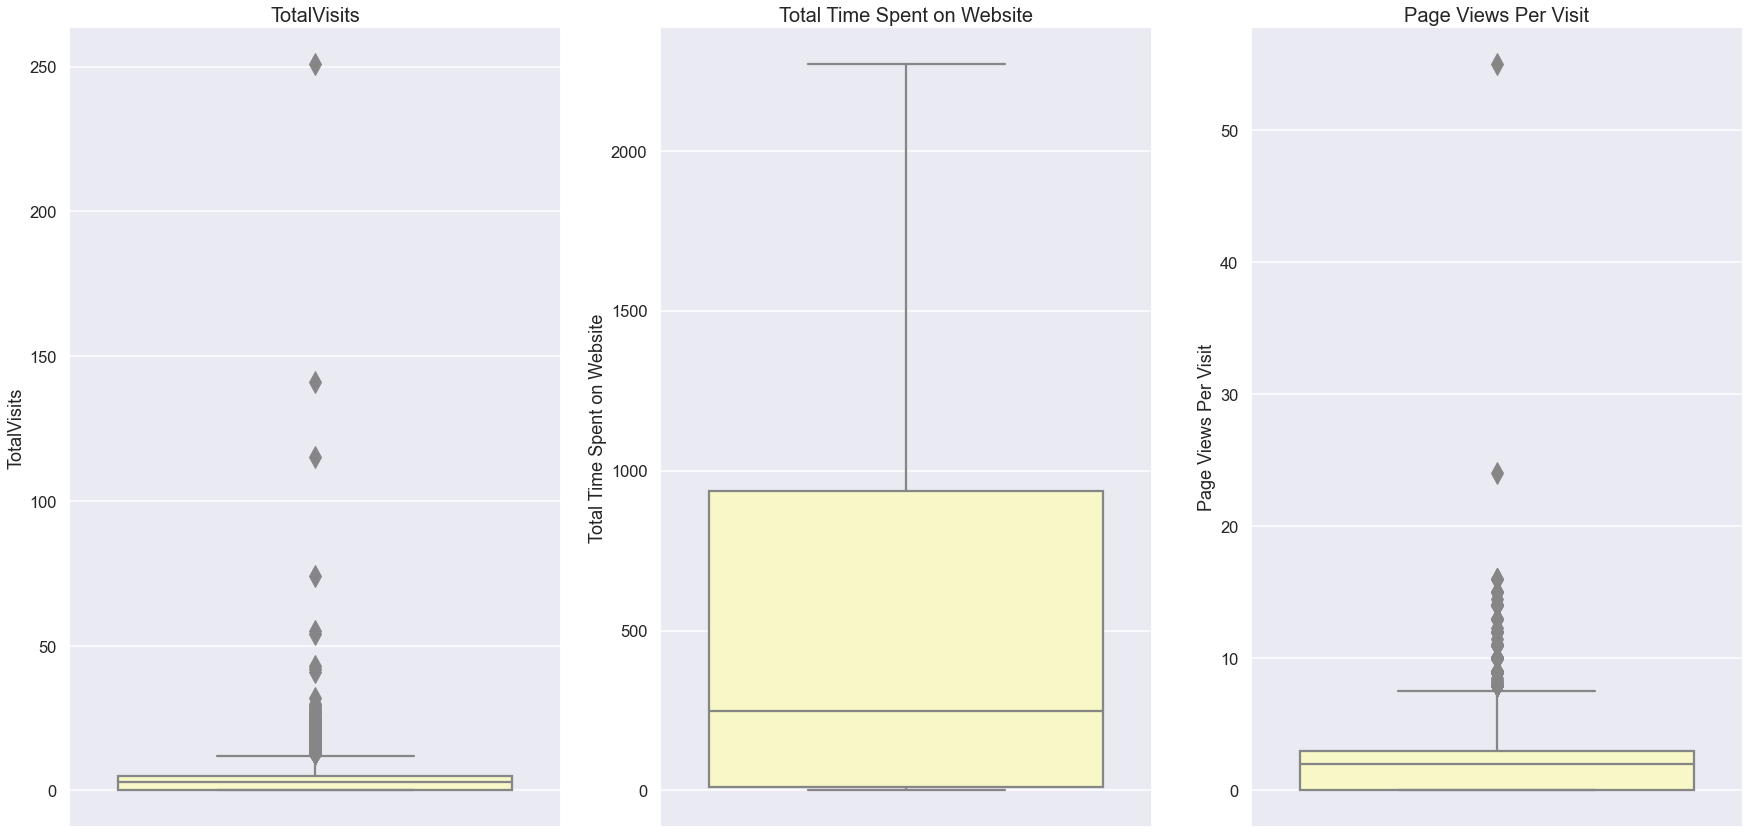

In [ ]:
# we are goint to set  size of figure, context and gridlines

plt.figure(figsize=(30,50))
plt.tight_layout()
sns.set_style('darkgrid')
sns.set_context('talk')

# Title names for the columns in the dataset

col={0:'TotalVisits',1:'Total Time Spent on Website',2:'Page Views Per Visit'}

# Visualising the outliers with boxplot for all the variables 

for i in range(3):
    plt.subplot(3,3,i+1)
    plt.title(col[i],fontsize=20)
    sns.boxplot(x=edu_inp1[col[i]],data=edu_inp1,palette='RdYlBu',orient='v',fliersize=15)  # using boxplot

In [ ]:

# we can see we have range from 0 to 251 for'TotalVisits' variable

ranges_total_visits={'TotalVisits_0_50': 50,'TotalVisits_50_100': 100,'TotalVisits_100_150': 150,
                     'TotalVisits_150_200' : 200,'TotalVisits_200_250': 250,'TotalVisits_250_300': 300}

#we are  Assigning '1' or '0' to each bins

for i in range(len(list(ranges_total_visits.keys()))):
    edu_inp1[list(ranges_total_visits.keys())[i]]=edu_inp1['TotalVisits'].map(lambda x: 1 if (x < list(ranges_total_visits.values())[i] and x >= (list(ranges_total_visits.values())[i] - 50)) else 0)

In [ ]:

# As we have range from 0 to 55 for'Page Views Per Visit' variable

ranges_total_visits_1={'Page Views Per Visit_0_10': 10,'Page Views Per Visit_10_20': 20,'Page Views Per Visit_20_30': 30,
                     'Page Views Per Visit_30_40' : 40,'Page Views Per Visit_40_50': 50,'Page Views Per Visit_50_60': 60}

# Assigning '1' or '0' to each bins

for i in range(len(list(ranges_total_visits_1.keys()))):
    edu_inp1[list(ranges_total_visits_1.keys())[i]]=edu_inp1['Page Views Per Visit'].map(lambda x: 1 if (x < list(ranges_total_visits_1.values())[i] and x >= (list(ranges_total_visits_1.values())[i] - 10)) else 0)

creating bins surely removed the outliers we can further proceed forward

now we are trying to remove some redundant column variables

In [ ]:
redundancy=['TotalVisits','Page Views Per Visit','TotalVisits_150_200','TotalVisits_200_250','Page Views Per Visit_30_40','Page Views Per Visit_40_50']

edu_inp1=edu_inp1.drop(redundancy,axis=1)

edu_inp1.head()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,0,674,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,1,1532,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,305,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0,0,1,1428,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


# preparation of data

# test train split

In [ ]:
# Importing train-test-split method from sklearn - model selection

from sklearn.model_selection import train_test_split

In [ ]:
# Separating target variable from dependent variable

z=edu_inp1['Converted']     # putting target variable 'Converted' to a new series 'z'

z.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [ ]:
# Putting dependent variable in a new dataset called 'P'

P=edu_inp1.drop('Converted',1)

P.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,674,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,1532,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,0,0,305,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,0,0,1428,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
# now we are going to split the data set into test and train data set

P_train,P_test,z_train,z_test=train_test_split(P, z, train_size=0.7, test_size=0.3, random_state=100)

# feature standardization

In [ ]:
#going to import standard scalar from sk learn preprocessing library

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()  # Creating an object

In [ ]:
# Now, Scaling the 'Total Time Spent on Website' variables with standard scaler and fitting - transforming the X - train dataset

P_train[['Total Time Spent on Website']]=scaler.fit_transform(P_train[['Total Time Spent on Website']])

P_train.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
1871,0,0,-0.885371,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6795,0,0,0.005716,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3516,0,0,-0.691418,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
8105,0,0,1.365219,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3934,0,0,-0.885371,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
## WE ARE Checking the conversion rate from 'converted' column as it denotes the target variable

(sum(z)/len(z.index))*100

38.53896103896104

# CORRELATION CHART OF THE DATASET

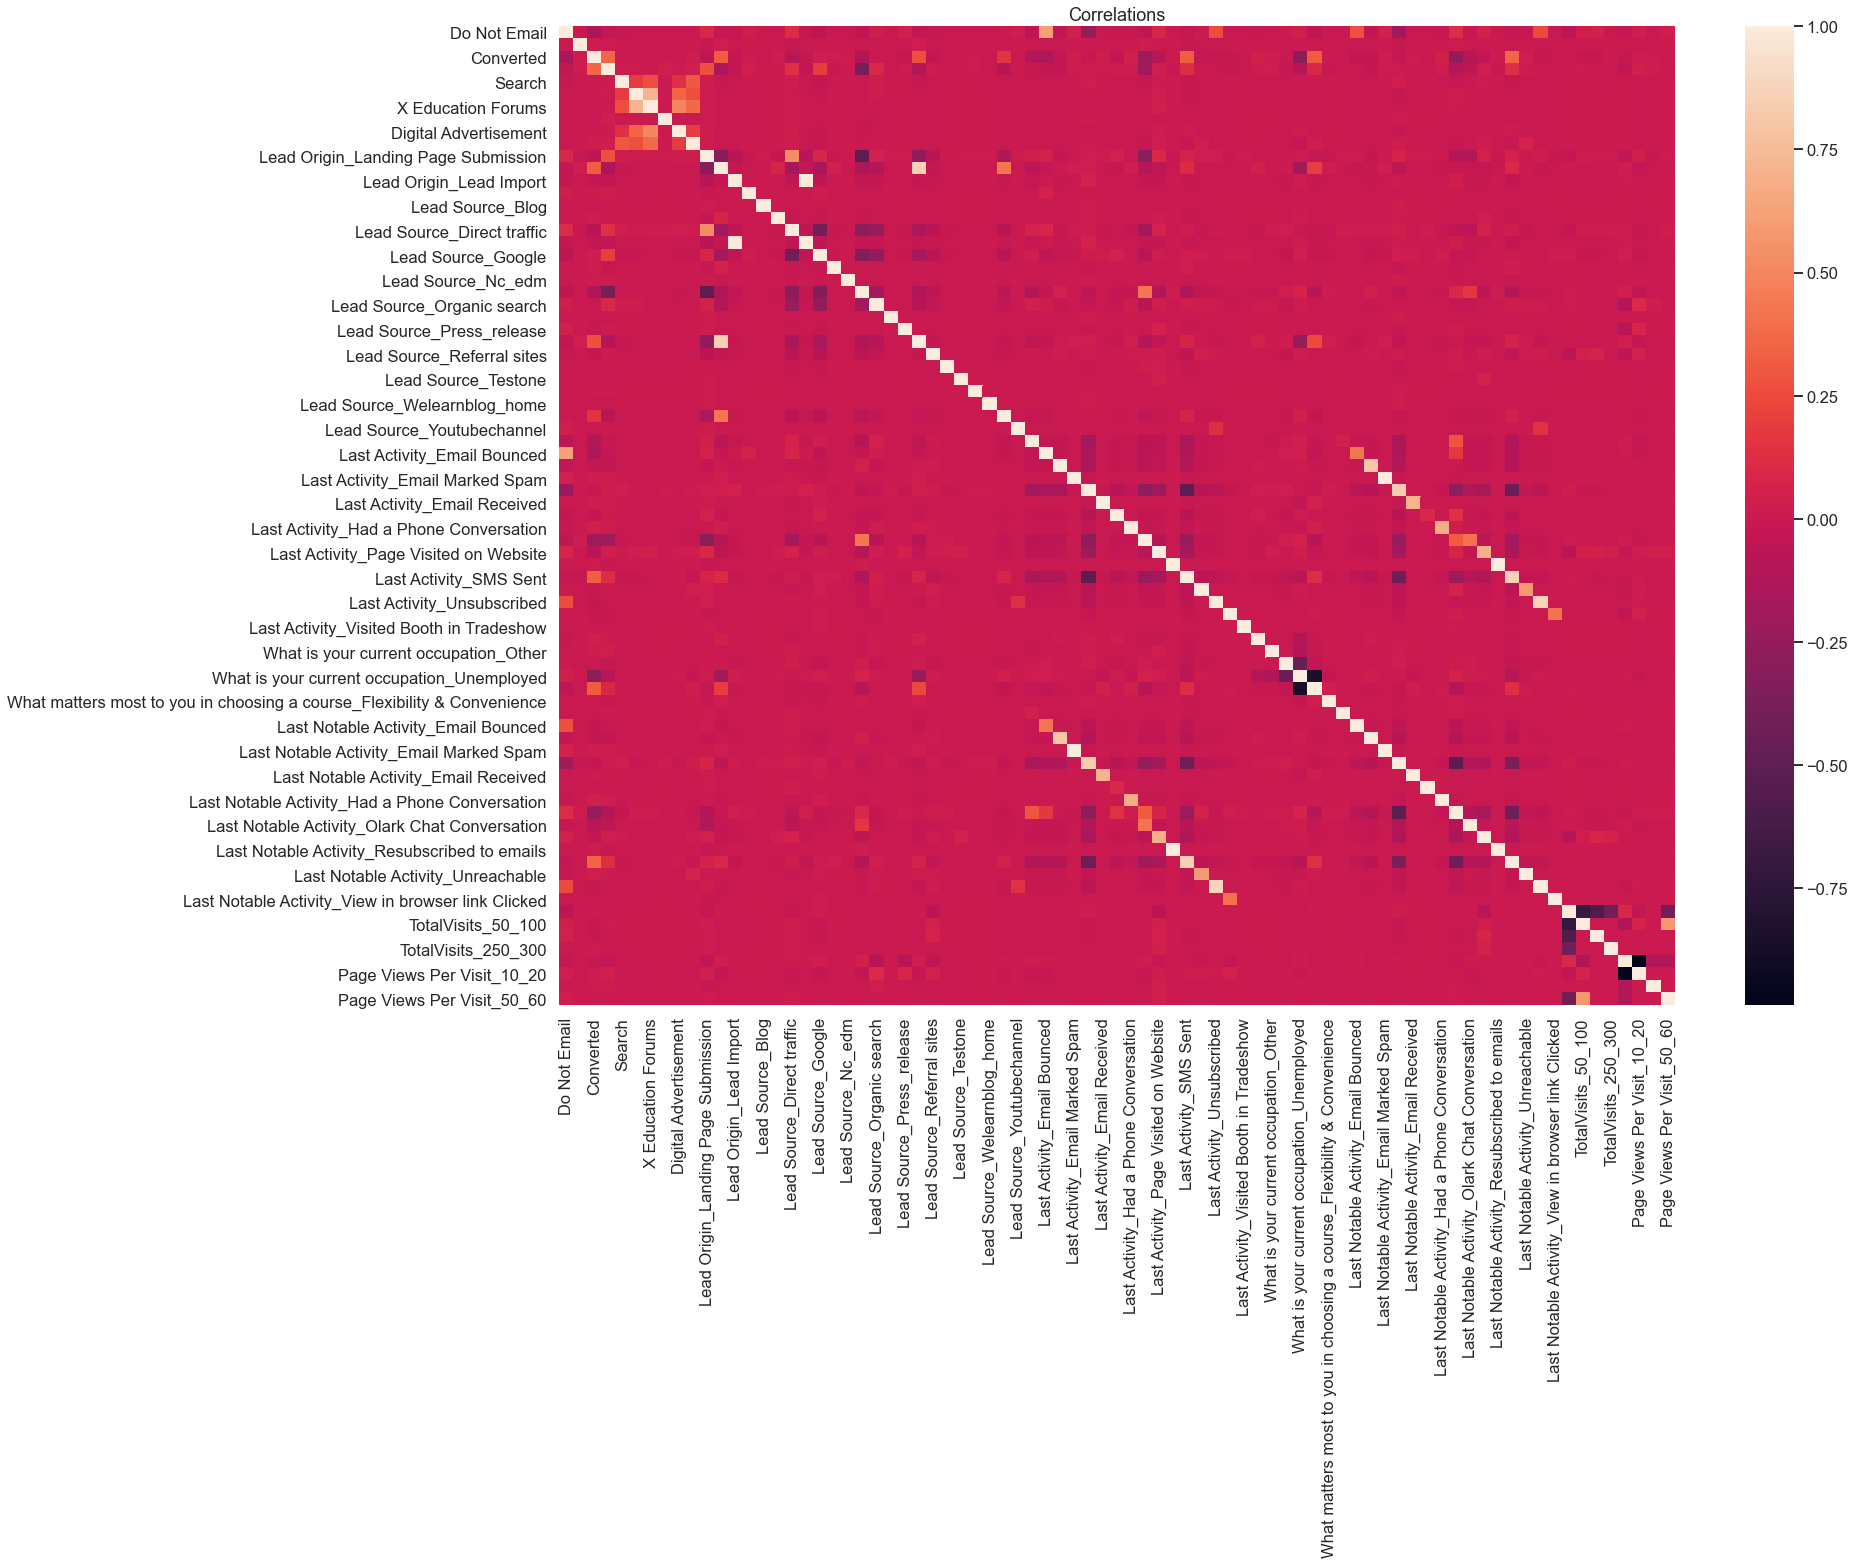

In [ ]:
# setting the figure size

plt.figure(figsize=(25,18))

# setting the title

plt.title('Correlations')

# Plotting a heatmap

sns.heatmap(edu_inp1.corr(method='pearson'))

plt.show()

in this heatmap we can see there are two variables having high correlation so we gotta drop them

we are going to drop highly correlated dummy variables categories

In [ ]:
corri_dummy=['Lead Source_Olark chat','What is your current occupation_Unemployed']

P_train=P_train.drop(corri_dummy,1)      # dropping from P train set

P_test=P_test.drop(corri_dummy,1)       # dropping from P test set

# NOW  SINCE WE HAVE DROPPED CHECKING AGAIN THE CORRELATION

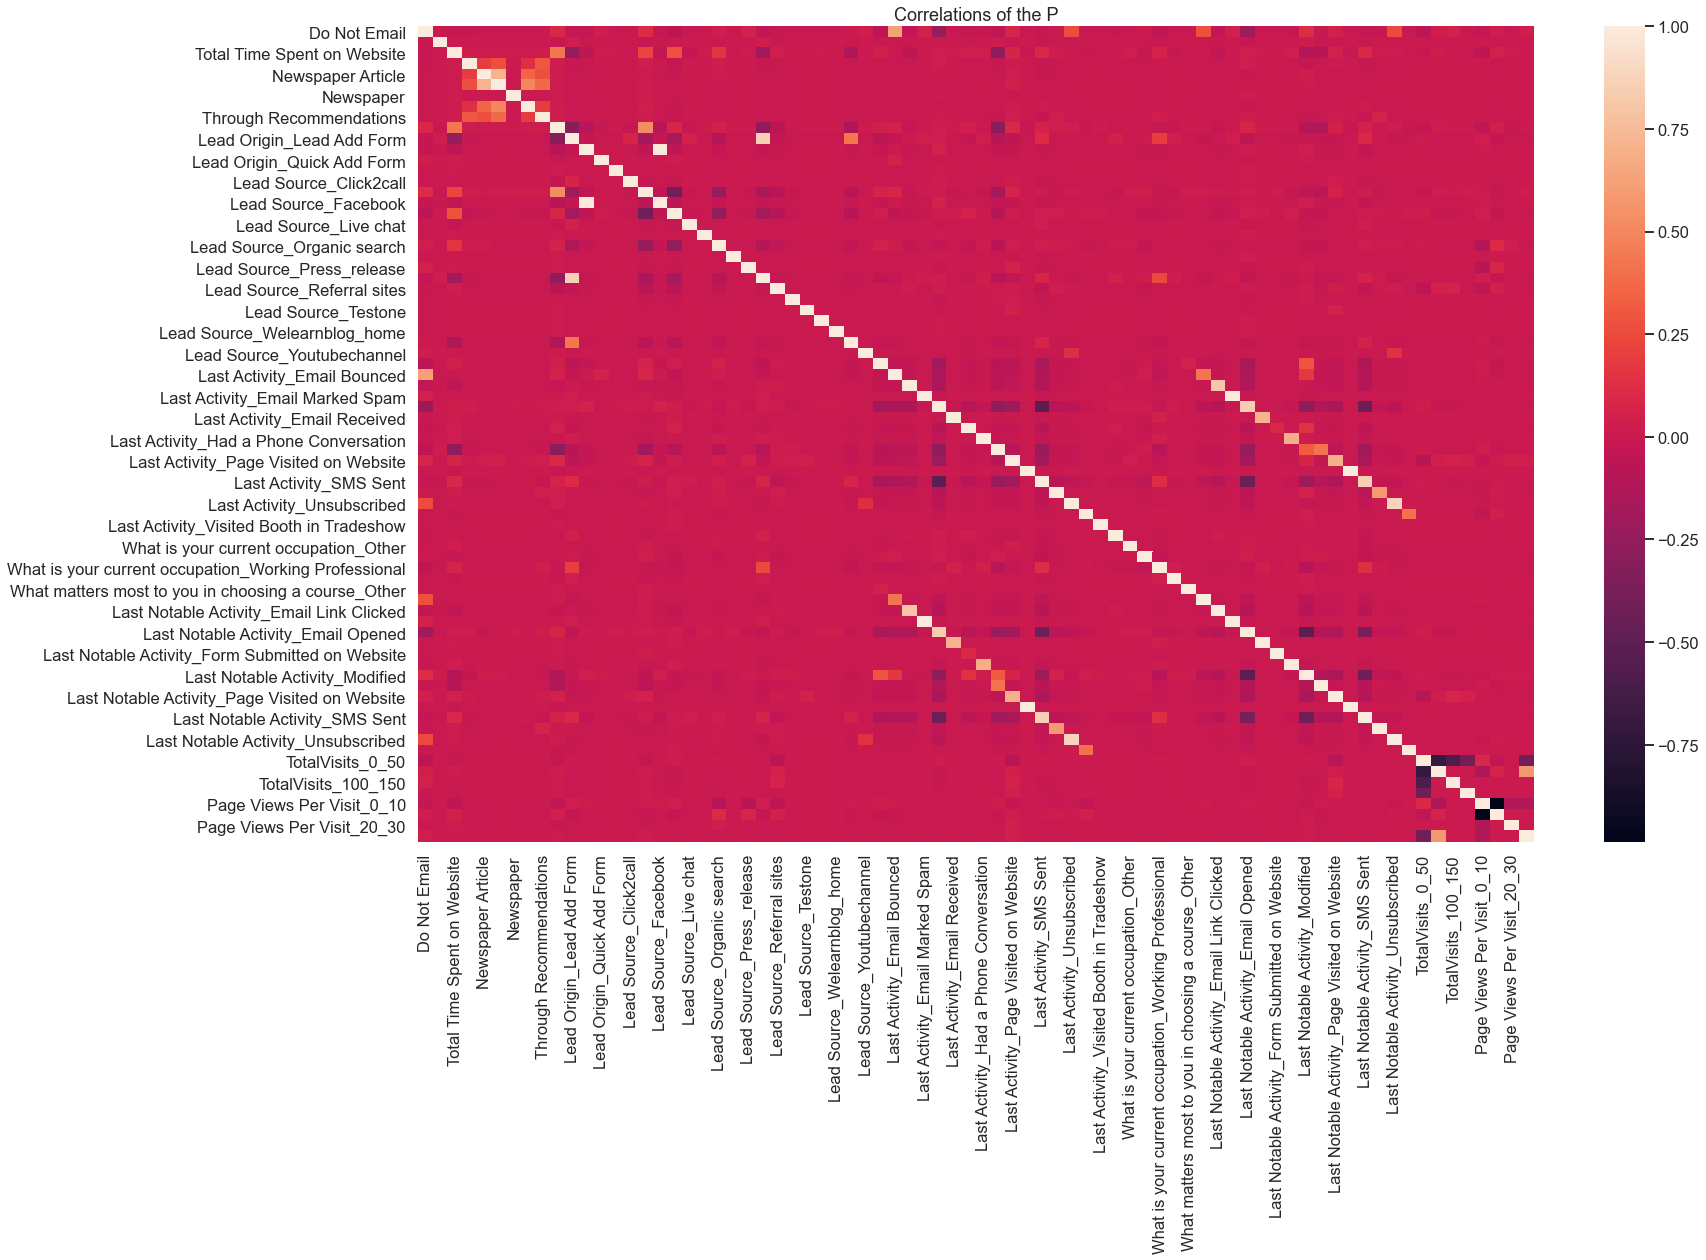

In [ ]:
# setting the figure size

plt.figure(figsize=(25,15))

# setting the title

plt.title('Correlations of the P')

# Plotting a heatmap

sns.heatmap(edu_inp1[P_train.columns].corr(method='spearman'))

plt.show()

WE CAN SEE BOTH OF THEM ARE REMOVED NOW WE CAN PROCEED FURTHER

# MAKING A MODEL

In [ ]:
# importing necessary library

import statsmodels.api as sm

In [ ]:
logis=sm.GLM(z_train,(sm.add_constant(P_train)),familt=sm.families.Binomial())
logis.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6398
Model Family:                Gaussian   Df Model:                           69
Link Function:               identity   Scale:                         0.13678
Method:                          IRLS   Log-Likelihood:                -2708.7
Date:                Mon, 08 Mar 2021   Deviance:                       875.08
Time:                        19:19:49   Pearson chi2:                     875.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.8081      0.147      5.513      0.000       0.521       1.095
Do Not Email                                                               -0.1237      0.025     -5.047      0.000      -0.172      -0.076
Do Not Call                                                                 0.4896      0.262      1.869      0.062      -0.024       1.003
Total Time Spent on Website                                                 0.1835      0.005     35.232      0.000       0.173       0.194
Search                                                                      0.0879      0.121      0.724      0.469      -0.150       0.326
Newspaper Article                                                           0.6322      0.371      1.706      0.088      -0.094       1.358
X Education Forums                                                         -0.7041      0.611     -1.153      0.249      -1.901       0.493
Newspaper                                                                  -0.6868      0.370     -1.855      0.064      -1.412       0.039
Digital Advertisement                                                      -0.3821      0.262     -1.459      0.145      -0.895       0.131
Through Recommendations                                                     0.1414      0.157      0.899      0.369      -0.167       0.450
Lead Origin_Landing Page Submission                                        -0.0250      0.014     -1.844      0.065      -0.052       0.002
Lead Origin_Lead Add Form                                                   0.4841      0.071      6.794      0.000       0.344       0.624
Lead Origin_Lead Import                                                     0.1788      0.264      0.676      0.499      -0.339       0.697
Lead Origin_Quick Add Form                                                  0.3403      0.371      0.916      0.359      -0.388       1.068
Lead Source_Blog                                                           -0.4794      0.370     -1.294      0.196      -1.205       0.246
Lead Source_Click2call                                                     -0.1588      0.226     -0.704      0.482      -0.601       0.283
Lead Source_Direct traffic                                                 -0.1737      0.020     -8.662      0.000      -0.213      -0.134
Lead Source_Facebook                                                       -0.3494      0.265     -1.320      0.187      -0.868       0.169
Lead Source_Google                                                         -0.1200      0.017     -7.037      0.000      -0.153      -0.087
Lea

we have generalized linear model we can tell that there are so variables with insignificant p values,Here we will use rfe for feature selection as we have 70 variables and checking one by one is not an efficient way to do so.

# using RFE

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

log_reg=LogisticRegression()                 # creating an object

# Running RFE with two different variables count to find best model¶

RFE Test - 1

In [ ]:
# Running rfe for 19 variables

rfem = RFE(log_reg,19)

rfem = rfem.fit(P_train,z_train)   # fitting

In [ ]:
rfem.support_  # checking for true and false assigned to the variables after rfe

array([ True, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False,  True,
       False, False,  True, False, False, False,  True, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True, False,  True, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [ ]:
# selecting columns only which are 'True' in rfem.support_ i.e True columns were selected for creating a model

col=P_train.columns[rfem.support_]

P_train_1=sm.add_constant(P_train[col])    # Adding constant

In [ ]:
# creating 1st model after RFE

logiX1=sm.GLM(z_train,P_train_1,family=sm.families.Binomial())

reg1=logiX1.fit()

reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2679.1
Date:                Mon, 08 Mar 2021   Deviance:                       5358.3
Time:                        19:20:00   Pearson chi2:                 7.26e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1701      0.104     11.259      0.000       0.966       1.374
Do Not Email                                            -1.2346      0.193     -6.382      0.000      -1.614      -0.855
Total Time Spent on Website                              1.0853      0.039     27.645      0.000       1.008       1.162
Lead Origin_Lead Add Form                                2.7400      0.195     14.053      0.000       2.358       3.122
Lead Source_Direct traffic                              -1.2903      0.114    -11.343      0.000      -1.513      -1.067
Lead Source_Google                                      -0.9024      0.107     -8.460      0.000      -1.111      -0.693
Lead Source_Organic search                              -1.0645      0.132     -8.043      0.000      -1.324      -0.805
Lead Source_Referral sites                              -1.1262      0.312     -3.605      0.000      -1.739      -0.514
Lead Source_Welingak website                             1.8681      0.744      2.512      0.012       0.410       3.326
Last Activity_Converted to Lead                         -1.0016      0.226     -4.435      0.000      -1.444      -0.559
Last Activity_Email Bounced                             -1.0933      0.345     -3.171      0.002      -1.769      -0.418
Last Activity_Olark Chat Conversation                   -1.1949      0.193     -6.182      0.000      -1.574      -0.816
What is your current occupation_Housewife               22.8758   1.37e+04      0.002      0.999   -2.69e+04    2.69e+04
What is your current occupation_Working Professional     2.7957      0.188     14.846      0.000       2.427       3.165
Last Notable Activity_Email Link Clicked                -1.8728      0.275     -6.818      0.000      -2.411      -1.334
Last Notable Activity_Email Opened                      -1.3280      0.087    -15.274      0.000      -1.498      -1.158
Last Notable Activity_Had a Phone Conversation           2.0560      1.105      1.861      0.063      -0.110       4.222
Last Notable Activity_Modified                          -1.7097      0.099    -17.196      0.000      -1.905      -1.515
Last Notable Activity_Olark Chat Conversation           -1.4494      0.374     -3.876      0.000      -2.182      -0.717
Last Notable Activity_Page Visited on Website           -1.5749      0.192     -8.219      0.000      -1.950      -1.199
========================================================================================================================
"""

Now, From the above summary presented here we can see that there are some features having high p -values, we will drop features which is having insignificant values one by one and create new model again  until all the features attain significant p- value.

# calculating vifs

In [ ]:
# importing VIFs library

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# we are Creating vif dataframe

vif=pd.DataFrame()

# now we are adding same features as the p_train dataset have

vif['Features']=P_train_1[col].columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(P_train_1[col].values,i) for i in range(P_train_1[col].shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)


vif   # Viewing the dataset

,Features,VIF
16,Last Notable Activity_Modified,2.58
0,Do Not Email,1.89
10,Last Activity_Olark Chat Conversation,1.82
9,Last Activity_Email Bounced,1.80
4,Lead Source_Google,1.79
3,Lead Source_Direct traffic,1.73
14,Last Notable Activity_Email Opened,1.73
2,Lead Origin_Lead Add Form,1.46
17,Last Notable Activity_Olark Chat Conversation,1.35
5,Lead Source_Organic search,1.30


WE CAN SEE ALL THE VIF VALUES ARE LESS THAN 5 SO THERE IS NO ISSUE WITH multicollinearity

As expained before we will drop the highest in-significant features i.e 'What is your current occupation_Housewife' having 0.999 p - value.

In [ ]:
# Dropping the most insignificant values ('What is your current occupation_Housewife') and constant

P_train_2=P_train_1.drop(['const','What is your current occupation_Housewife'],1)

In [ ]:
# NOW WE ARE CREATING A NEW MODEL

P_train_2=sm.add_constant(P_train_2)                              # Adding constant
logis2=sm.GLM(z_train,P_train_2,families=sm.families.Binomial())  # Using GLM, creating model
reg2=logis2.fit()                                                 # Fitting our model
reg2.summary()                         

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Gaussian   Df Model:                           18
Link Function:               identity   Scale:                         0.13833
Method:                          IRLS   Log-Likelihood:                -2770.9
Date:                Mon, 08 Mar 2021   Deviance:                       892.07
Time:                        19:20:01   Pearson chi2:                     892.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6560      0.015     43.729      0.000       0.627       0.685
Do Not Email                                            -0.1504      0.023     -6.609      0.000      -0.195      -0.106
Total Time Spent on Website                              0.1842      0.005     35.569      0.000       0.174       0.194
Lead Origin_Lead Add Form                                0.4043      0.022     18.503      0.000       0.361       0.447
Lead Source_Direct traffic                              -0.1856      0.016    -11.910      0.000      -0.216      -0.155
Lead Source_Google                                      -0.1245      0.015     -8.360      0.000      -0.154      -0.095
Lead Source_Organic search                              -0.1509      0.018     -8.238      0.000      -0.187      -0.115
Lead Source_Referral sites                              -0.1718      0.041     -4.232      0.000      -0.251      -0.092
Lead Source_Welingak website                             0.1848      0.043      4.262      0.000       0.100       0.270
Last Activity_Converted to Lead                         -0.1096      0.024     -4.548      0.000      -0.157      -0.062
Last Activity_Email Bounced                             -0.0636      0.033     -1.953      0.051      -0.127       0.000
Last Activity_Olark Chat Conversation                   -0.1395      0.020     -6.881      0.000      -0.179      -0.100
What is your current occupation_Working Professional     0.3435      0.018     19.021      0.000       0.308       0.379
Last Notable Activity_Email Link Clicked                -0.3005      0.036     -8.447      0.000      -0.370      -0.231
Last Notable Activity_Email Opened                      -0.2243      0.013    -17.590      0.000      -0.249      -0.199
Last Notable Activity_Had a Phone Conversation           0.2275      0.113      2.020      0.043       0.007       0.448
Last Notable Activity_Modified                          -0.2816      0.014    -20.757      0.000      -0.308      -0.255
Last Notable Activity_Olark Chat Conversation           -0.2654      0.040     -6.651      0.000      -0.344      -0.187
Last Notable Activity_Page Visited on Website           -0.2662      0.026    -10.138      0.000      -0.318      -0.215
========================================================================================================================
"""

In [ ]:
# Dropping the most insignificant values ('Last Activity_Email Bounced') and constant

P_train_3=P_train_2.drop(['const','Last Activity_Email Bounced'],1)

In [ ]:
# Recreating a new model

P_train_3=sm.add_constant(P_train_3)                                # Adding constant
logis3=sm.GLM(z_train,P_train_3,families=sm.families.Binomial())    # Using GLM, creating model
reg3=logis3.fit()                                                   # Fitting our model
reg3.summary()                                                      # Showing the summary of the model created

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Gaussian   Df Model:                           17
Link Function:               identity   Scale:                         0.13839
Method:                          IRLS   Log-Likelihood:                -2772.8
Date:                Mon, 08 Mar 2021   Deviance:                       892.60
Time:                        19:20:01   Pearson chi2:                     893.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6565      0.015     43.763      0.000       0.627       0.686
Do Not Email                                            -0.1774      0.018     -9.812      0.000      -0.213      -0.142
Total Time Spent on Website                              0.1841      0.005     35.533      0.000       0.174       0.194
Lead Origin_Lead Add Form                                0.4051      0.022     18.538      0.000       0.362       0.448
Lead Source_Direct traffic                              -0.1853      0.016    -11.892      0.000      -0.216      -0.155
Lead Source_Google                                      -0.1238      0.015     -8.313      0.000      -0.153      -0.095
Lead Source_Organic search                              -0.1501      0.018     -8.191      0.000      -0.186      -0.114
Lead Source_Referral sites                              -0.1713      0.041     -4.217      0.000      -0.251      -0.092
Lead Source_Welingak website                             0.1863      0.043      4.296      0.000       0.101       0.271
Last Activity_Converted to Lead                         -0.1063      0.024     -4.423      0.000      -0.153      -0.059
Last Activity_Olark Chat Conversation                   -0.1351      0.020     -6.703      0.000      -0.175      -0.096
What is your current occupation_Working Professional     0.3437      0.018     19.031      0.000       0.308       0.379
Last Notable Activity_Email Link Clicked                -0.3013      0.036     -8.468      0.000      -0.371      -0.232
Last Notable Activity_Email Opened                      -0.2253      0.013    -17.674      0.000      -0.250      -0.200
Last Notable Activity_Had a Phone Conversation           0.2264      0.113      2.010      0.044       0.006       0.447
Last Notable Activity_Modified                          -0.2859      0.013    -21.347      0.000      -0.312      -0.260
Last Notable Activity_Olark Chat Conversation           -0.2693      0.040     -6.756      0.000      -0.347      -0.191
Last Notable Activity_Page Visited on Website           -0.2632      0.026    -10.041      0.000      -0.315      -0.212
========================================================================================================================
"""

In [ ]:
# Dropping the most insignificant values ('Last Notable Activity_Had a Phone Conversation') and constant

P_train_4=P_train_3.drop(['const','Last Notable Activity_Had a Phone Conversation'],1)

In [ ]:
P_train_4=sm.add_constant(P_train_4)                                # Adding constant
logis3=sm.GLM(z_train,P_train_4,families=sm.families.Binomial())    # Using GLM, creating model
reg3=logis3.fit()                                                   # Fitting our model
reg3.summary()             

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Gaussian   Df Model:                           16
Link Function:               identity   Scale:                         0.13845
Method:                          IRLS   Log-Likelihood:                -2774.8
Date:                Mon, 08 Mar 2021   Deviance:                       893.15
Time:                        19:20:02   Pearson chi2:                     893.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6580      0.015     43.910      0.000       0.629       0.687
Do Not Email                                            -0.1779      0.018     -9.838      0.000      -0.213      -0.142
Total Time Spent on Website                              0.1841      0.005     35.533      0.000       0.174       0.194
Lead Origin_Lead Add Form                                0.4044      0.022     18.505      0.000       0.362       0.447
Lead Source_Direct traffic                              -0.1854      0.016    -11.897      0.000      -0.216      -0.155
Lead Source_Google                                      -0.1234      0.015     -8.287      0.000      -0.153      -0.094
Lead Source_Organic search                              -0.1502      0.018     -8.196      0.000      -0.186      -0.114
Lead Source_Referral sites                              -0.1714      0.041     -4.220      0.000      -0.251      -0.092
Lead Source_Welingak website                             0.1864      0.043      4.296      0.000       0.101       0.271
Last Activity_Converted to Lead                         -0.1065      0.024     -4.428      0.000      -0.154      -0.059
Last Activity_Olark Chat Conversation                   -0.1352      0.020     -6.706      0.000      -0.175      -0.096
What is your current occupation_Working Professional     0.3441      0.018     19.045      0.000       0.309       0.379
Last Notable Activity_Email Link Clicked                -0.3028      0.036     -8.509      0.000      -0.373      -0.233
Last Notable Activity_Email Opened                      -0.2268      0.013    -17.828      0.000      -0.252      -0.202
Last Notable Activity_Modified                          -0.2873      0.013    -21.482      0.000      -0.314      -0.261
Last Notable Activity_Olark Chat Conversation           -0.2707      0.040     -6.792      0.000      -0.349      -0.193
Last Notable Activity_Page Visited on Website           -0.2647      0.026    -10.099      0.000      -0.316      -0.213
========================================================================================================================
"""

Now, from the above summary we can say that all the variables present in this model are significant as no variables is having p - value greater than 5% hence we can proceed with our next step

# creating vif

In [ ]:
# Checking VIF again just to be sure

P_train_4_1=P_train_4.drop('const',1)     # dropping constant and saving in new dataset
vif=pd.DataFrame()                        # Creating new VIF DataFrame
vif['Features']=P_train_4_1.columns       # Adding final train dataset features

# Now calculating

vif['VIF']=[variance_inflation_factor(P_train_4_1.values,i) for i in range(P_train_4_1.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif dataset

vif=vif.sort_values(by='VIF',ascending=False)

vif   # viewing the dataset

,Features,VIF
13,Last Notable Activity_Modified,2.50
9,Last Activity_Olark Chat Conversation,1.80
4,Lead Source_Google,1.77
12,Last Notable Activity_Email Opened,1.73
3,Lead Source_Direct traffic,1.72
2,Lead Origin_Lead Add Form,1.46
14,Last Notable Activity_Olark Chat Conversation,1.35
5,Lead Source_Organic search,1.29
7,Lead Source_Welingak website,1.24
8,Last Activity_Converted to Lead,1.24


As confirmed earlier, no sign of multicollinearity shown from above vif dataframe 

# NOW WE ARE PREDICTING A TRAIN MODEL

In [ ]:
# Predicting the train dataset with our final model

z_train_pred=reg3.predict(P_train_4)

# Creating a new dataset and saving predicted values in it

z_train_pred_final=pd.DataFrame({'Converted':z_train.values,'Converted_probability':z_train_pred,'ID':z_train.index})

z_train_pred_final.head()   # viewing first 5 rows

,Converted,Converted_probability,ID
1871,0,0.268197,1871
6795,0,0.246838,6795
3516,0,0.303907,3516
8105,0,0.785984,8105
3934,0,0.207716,3934


# plotting a ROC

ROC curve shows the RELATION between sensitivity and specificity - means if sensitivity increases specificity will decrease.
The curve closer to the left side border then right side of the border is more accurate.
The curve closer to the 45-degree diagonal of the ROC space is less accurate.

In [ ]:
# Importing necessary libraries for roc curve

from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

# Creating a function to plot roc curve with auc score

def edu_roc( real, probability ):
    
    # Creating roc curve values like false positive rate , true positive rate and threshold
    
    fpr, tpr, thresholds = roc_curve( real, probability,drop_intermediate = False )   
    
    # Calculating the auc score(area under the curve)
    
    auc_score = roc_auc_score( real, probability )    
    
    # Setting the figure size
    
    plt.figure(figsize=(8, 4))
    
    # Plotting the roc curve
    
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    
    # Plotting the 45% dotted line 
    plt.plot([0, 1], [0, 1], 'r--')
    
    # Setting the x axis linit
    
    plt.xlim([0.0, 1.0])
    
    # Setting the y axis limit
    
    plt.ylim([0.0, 1.05])
    
    # Setting the x axis label
    
    plt.xlabel('False Positive Rate')
    
    # Setting the y axis label
    
    plt.ylabel('True Positive Rate')
    
    # Setting the title
    
    plt.title('Receiver operating characteristic')
    
    # Setting the legend on the left below to show the value of auc    
    
    plt.legend(loc="lower right")
    
    # Showing the plot# Importing necessary libraries for roc curve

from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

# Creating a function to plot roc curve with auc score

def edu_roc( real, probability ):
    
    # Creating roc curve values like false positive rate , true positive rate and threshold
    
    fpr, tpr, thresholds = roc_curve( real, probability,drop_intermediate = False )   
    
    # Calculating the auc score(area under the curve)
    
    auc_score = roc_auc_score( real, probability )    
    
    # Setting the figure size
    
    plt.figure(figsize=(8, 4))
    
    # Plotting the roc curve
    
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    
    # Plotting the 45% dotted line 
    plt.plot([0, 1], [0, 1], 'r--')
    
    # Setting the x axis linit
    
    plt.xlim([0.0, 1.0])
    
    # Setting the y axis limit
    
    plt.ylim([0.0, 1.05])
    
    # Setting the x axis label
    
    plt.xlabel('False Positive Rate')
    
    # Setting the y axis label
    
    plt.ylabel('True Positive Rate')
    
    # Setting the title
    
    plt.title('Receiver operating characteristic')
    
    # Setting the legend on the left below to show the value of auc    
    
    plt.legend(loc="lower right")
    
    # Showing the plot
    plt.show()

    return None   # no return

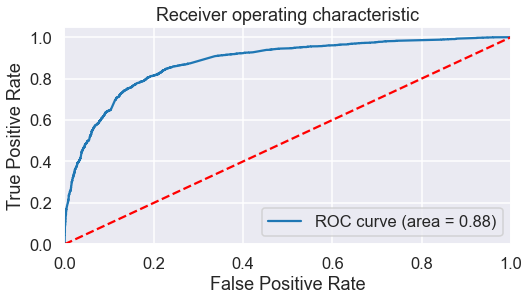

In [ ]:

# Calling the roc curve for plotting

edu_roc(z_train_pred_final.Converted, z_train_pred_final.Converted_probability)

 following Points can be concluded from above roc curve -

we can see that The curve is closer to the left side of the border than to the right side hence our model is having great accuracy.
The area under the curve is 88% of the total area.

# optimal probability cutoff point

In [ ]:
# creating 10 points out of which one we will choose for our cutoff point

numbers=[float(x)/10 for x in range(10)]  # from 0 to 0.9 with set size 0.1

for i in numbers:
    z_train_pred_final[i]=z_train_pred_final['Converted_probability'].map(lambda x:1 if x > i else 0)   #  Mapping the probablities for each 10 points
z_train_pred_final.head()   # Viewing the first 5 rows

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.268197,1871,1,1,1,0,0,0,0,0,0,0
6795,0,0.246838,6795,1,1,1,0,0,0,0,0,0,0
3516,0,0.303907,3516,1,1,1,1,0,0,0,0,0,0
8105,0,0.785984,8105,1,1,1,1,1,1,1,1,0,0
3934,0,0.207716,3934,1,1,1,0,0,0,0,0,0,0


Now, since we have created series of points let's check the possibilities of choosing any one points from 0 to 0.9. We will do this by finding 'Accuracy', 'Sensitivity' and 'Specificity' for each points. These three methods will tell us how our model is - whether it is having low accuracy or high or number of relevant data points is high or low etc.

In [ ]:
# Caculating accuracy, sensitivity and specificity with probability cutoffs

# importing necessary library

from sklearn.metrics import confusion_matrix

# Creating a dataframe to store all the values to be created

df_cutoffs=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])

# from 0 to 0.9 with set size 0.1

var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   

for i in var:
    cm_matrix=confusion_matrix(z_train_pred_final['Converted'],z_train_pred_final[i])  # creating confusion matrix 
    total=sum(sum(cm_matrix))                                                          # Taking the sum of the matrix
    accuracy=(cm_matrix[0,0]+cm_matrix[1,1])/total                                     # Storing Accuracy Data 
    sensitivity=cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                         # Storing Sensitivity Data
    specificity=cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                         # Storing Specificity Data
    df_cutoffs.loc[i]=[i, accuracy, sensitivity, specificity]                          # Inserting all the data into the dataframe created earlier
print(df_cutoffs)   # Printing the data

     Probability  Accuracy  Sensitvity  Specificity
0.0          0.0  0.431973    0.995539     0.084708
0.1          0.1  0.559833    0.974453     0.304348
0.2          0.2  0.690012    0.940795     0.535482
0.3          0.3  0.787879    0.864558     0.740630
0.4          0.4  0.809524    0.793998     0.819090
0.5          0.5  0.802257    0.646796     0.898051
0.6          0.6  0.784477    0.532036     0.940030
0.7          0.7  0.750618    0.393350     0.970765
0.8          0.8  0.718615    0.287510     0.984258
0.9          0.9  0.682127    0.173966     0.995252


As we can see from the above data we have created points for accuracy , sensitivity and specificity for all probability points from 0 to 0.9. Out of this we have to choose one af them as a cutoff point and it is probability cutoff = 0.4 because all the accuracy , sensitivity and specificity are having almost  same value which is an ideal point to consider for as we can't ignore any one from three.

Let's plot this data and see the convergent point or meeting point for all three point 'accuracy' , 'sensitivity' and 'specificity'

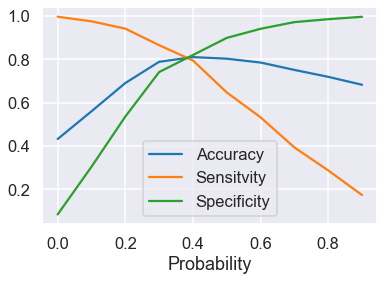

In [ ]:
# Ploting 'Accuracy' , 'Sensitivity' and 'Specificity' for various probabilities(0.0 to 0.9).

df_cutoffs.plot.line(x='Probability', y=['Accuracy','Sensitvity','Specificity'])   # line plotting
plt.show()


0.4 is the optimum point for taking probability cutoff as the meeting point 

In [ ]:
# Predicting the outcomes with probability cutoff as 0.4 by creating new columns in the final dataset

z_train_pred_final['Predicted']=z_train_pred_final['Converted_probability'].map(lambda x:1 if x >0.4 else 0 )  # Predicted value 

z_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
1871,0,0.268197,1871,1,1,1,0,0,0,0,0,0,0,0
6795,0,0.246838,6795,1,1,1,0,0,0,0,0,0,0,0
3516,0,0.303907,3516,1,1,1,1,0,0,0,0,0,0,0
8105,0,0.785984,8105,1,1,1,1,1,1,1,1,0,0,1
3934,0,0.207716,3934,1,1,1,0,0,0,0,0,0,0,0


# precision trade off

In [ ]:
# importing precision recall curve from sklearn library

from sklearn.metrics import precision_recall_curve

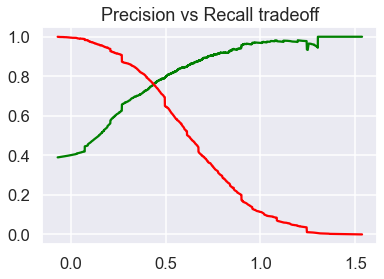

In [ ]:

p ,r, thresholds=precision_recall_curve(z_train_pred_final.Converted,z_train_pred_final.Converted_probability)
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

As we can see that there is a trade off between Precision and Recall and the meeting point is nearly at 0.5

# RFE Test - 2

In [ ]:
# Running RFE with variables 15

rfem2= RFE(log_reg, 15)
rfem2= rfem2.fit(P_train,z_train)
rfem2.support_

array([ True, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True, False,  True, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [ ]:
# selecting columns only which are 'True' in rfem.support_ i.e True columns were selected for creating a model

col2=P_train.columns[rfem2.support_]

P_train_rfe2=sm.add_constant(P_train[col2])    # Adding constant

In [ ]:
 #creating 1st model after RFE

logis_rfe2=sm.GLM(z_train,P_train_rfe2,family=sm.families.Binomial())

reg_rfe2=logis_rfe2.fit()

reg_rfe2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2746.8
Date:                Mon, 08 Mar 2021   Deviance:                       5493.6
Time:                        19:20:16   Pearson chi2:                 6.88e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2894      0.065      4.473      0.000       0.163       0.416
Do Not Email                                            -1.3263      0.190     -6.973      0.000      -1.699      -0.954
Total Time Spent on Website                              0.9265      0.035     26.714      0.000       0.859       0.994
Lead Origin_Lead Add Form                                3.3839      0.186     18.172      0.000       3.019       3.749
Lead Source_Welingak website                             1.9606      0.743      2.638      0.008       0.504       3.417
Last Activity_Converted to Lead                         -1.1618      0.221     -5.263      0.000      -1.594      -0.729
Last Activity_Email Bounced                             -1.0321      0.336     -3.068      0.002      -1.691      -0.373
Last Activity_Olark Chat Conversation                   -0.7956      0.191     -4.168      0.000      -1.170      -0.421
What is your current occupation_Housewife               22.7265    1.4e+04      0.002      0.999   -2.74e+04    2.75e+04
What is your current occupation_Working Professional     2.7547      0.187     14.755      0.000       2.389       3.121
Last Notable Activity_Email Link Clicked                -1.7558      0.274     -6.403      0.000      -2.293      -1.218
Last Notable Activity_Email Opened                      -1.2958      0.085    -15.159      0.000      -1.463      -1.128
Last Notable Activity_Had a Phone Conversation           1.8669      1.091      1.711      0.087      -0.272       4.005
Last Notable Activity_Modified                          -1.6631      0.098    -17.055      0.000      -1.854      -1.472
Last Notable Activity_Olark Chat Conversation           -1.3184      0.370     -3.568      0.000      -2.043      -0.594
Last Notable Activity_Page Visited on Website           -1.6038      0.187     -8.582      0.000      -1.970      -1.238
========================================================================================================================
"""

Now, From the above summary presented there are some features having high p -values, we will drop features which is having insignificant values one by one and create new model again and again until all the features attain significant p- value.

# CALCULATING VIF

In [ ]:
# Creating vif dataframe

vif=pd.DataFrame()

# adding same features as the x_train dataset have

vif['Features']=P_train_rfe2[col2].columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(P_train_rfe2[col2].values,i) for i in range(P_train_rfe2[col2].shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)


vif   # Viewing the dataset

,Features,VIF
12,Last Notable Activity_Modified,1.85
0,Do Not Email,1.81
5,Last Activity_Email Bounced,1.79
6,Last Activity_Olark Chat Conversation,1.78
2,Lead Origin_Lead Add Form,1.41
13,Last Notable Activity_Olark Chat Conversation,1.32
3,Lead Source_Welingak website,1.24
4,Last Activity_Converted to Lead,1.23
8,What is your current occupation_Working Profes...,1.13
1,Total Time Spent on Website,1.09


As we can see that all features are having vif values less than 5, hence there is no multicollinearity issue in the dataset.

In [ ]:
# Dropping the most insignificant values ('What is your current occupation_Housewife') and constant

P_train_rfe22=P_train_rfe2.drop(['const','What is your current occupation_Housewife'],1)

In [ ]:
# Creating a new model

P_train_rfe22=sm.add_constant(P_train_rfe22)                              # Adding constant
logis_rfe22=sm.GLM(z_train,P_train_rfe22,families=sm.families.Binomial())  # Using GLM, creating model
reg_rfe22=logis_rfe22.fit()                                                 # Fitting our model
reg_rfe22.summary()                                                    # Showing the summary of the model created

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Gaussian   Df Model:                           14
Link Function:               identity   Scale:                         0.14139
Method:                          IRLS   Log-Likelihood:                -2843.8
Date:                Mon, 08 Mar 2021   Deviance:                       912.40
Time:                        19:20:16   Pearson chi2:                     912.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5318      0.010     52.675      0.000       0.512       0.552
Do Not Email                                            -0.1751      0.023     -7.651      0.000      -0.220      -0.130
Total Time Spent on Website                              0.1654      0.005     33.650      0.000       0.156       0.175
Lead Origin_Lead Add Form                                0.5120      0.020     25.722      0.000       0.473       0.551
Lead Source_Welingak website                             0.1909      0.044      4.354      0.000       0.105       0.277
Last Activity_Converted to Lead                         -0.1432      0.024     -5.917      0.000      -0.191      -0.096
Last Activity_Email Bounced                             -0.0590      0.033     -1.794      0.073      -0.124       0.005
Last Activity_Olark Chat Conversation                   -0.0713      0.020     -3.640      0.000      -0.110      -0.033
What is your current occupation_Working Professional     0.3447      0.018     18.882      0.000       0.309       0.380
Last Notable Activity_Email Link Clicked                -0.2886      0.036     -8.041      0.000      -0.359      -0.218
Last Notable Activity_Email Opened                      -0.2239      0.013    -17.373      0.000      -0.249      -0.199
Last Notable Activity_Had a Phone Conversation           0.2339      0.114      2.056      0.040       0.011       0.457
Last Notable Activity_Modified                          -0.2796      0.014    -20.409      0.000      -0.306      -0.253
Last Notable Activity_Olark Chat Conversation           -0.2610      0.040     -6.470      0.000      -0.340      -0.182
Last Notable Activity_Page Visited on Website           -0.2784      0.027    -10.501      0.000      -0.330      -0.226
========================================================================================================================
"""

In [ ]:
# Dropping the most insignificant values ('Last NOTABLE Activity_Had a Phone Conversation') and constant

P_train_rfe23=P_train_rfe22.drop(['const','Last Notable Activity_Had a Phone Conversation'],1)

In [ ]:
P_train_rfe23=sm.add_constant(P_train_rfe23)                              # Adding constant
logis_rfe23=sm.GLM(z_train,P_train_rfe23,families=sm.families.Binomial())  # Using GLM, creating model
reg_rfe23=logis_rfe23.fit()                                                 # Fitting our model
reg_rfe23.summary()          

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Gaussian   Df Model:                           13
Link Function:               identity   Scale:                         0.14146
Method:                          IRLS   Log-Likelihood:                -2845.9
Date:                Mon, 08 Mar 2021   Deviance:                       913.00
Time:                        19:20:16   Pearson chi2:                     913.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5335      0.010     52.996      0.000       0.514       0.553
Do Not Email                                            -0.1758      0.023     -7.681      0.000      -0.221      -0.131
Total Time Spent on Website                              0.1654      0.005     33.655      0.000       0.156       0.175
Lead Origin_Lead Add Form                                0.5113      0.020     25.683      0.000       0.472       0.550
Lead Source_Welingak website                             0.1909      0.044      4.354      0.000       0.105       0.277
Last Activity_Converted to Lead                         -0.1433      0.024     -5.922      0.000      -0.191      -0.096
Last Activity_Email Bounced                             -0.0587      0.033     -1.785      0.074      -0.123       0.006
Last Activity_Olark Chat Conversation                   -0.0714      0.020     -3.644      0.000      -0.110      -0.033
What is your current occupation_Working Professional     0.3450      0.018     18.895      0.000       0.309       0.381
Last Notable Activity_Email Link Clicked                -0.2902      0.036     -8.085      0.000      -0.361      -0.220
Last Notable Activity_Email Opened                      -0.2255      0.013    -17.530      0.000      -0.251      -0.200
Last Notable Activity_Modified                          -0.2811      0.014    -20.543      0.000      -0.308      -0.254
Last Notable Activity_Olark Chat Conversation           -0.2625      0.040     -6.507      0.000      -0.342      -0.183
Last Notable Activity_Page Visited on Website           -0.2799      0.027    -10.561      0.000      -0.332      -0.228
========================================================================================================================
"""

In [ ]:
# Dropping the most insignificant values ('Last Activity_Email Bounced') and constant

P_train_rfe24=P_train_rfe23.drop(['const','Last Activity_Email Bounced'],1)

In [ ]:
# Creating a new model

P_train_rfe24=sm.add_constant(P_train_rfe23)                              # Adding constant
logis_rfe24=sm.GLM(z_train,P_train_rfe24,families=sm.families.Binomial())  # Using GLM, creating model
reg_rfe24=logis_rfe24.fit()                                                 # Fitting our model
reg_rfe24.summary()                         

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Gaussian   Df Model:                           13
Link Function:               identity   Scale:                         0.14146
Method:                          IRLS   Log-Likelihood:                -2845.9
Date:                Mon, 08 Mar 2021   Deviance:                       913.00
Time:                        19:20:16   Pearson chi2:                     913.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5335      0.010     52.996      0.000       0.514       0.553
Do Not Email                                            -0.1758      0.023     -7.681      0.000      -0.221      -0.131
Total Time Spent on Website                              0.1654      0.005     33.655      0.000       0.156       0.175
Lead Origin_Lead Add Form                                0.5113      0.020     25.683      0.000       0.472       0.550
Lead Source_Welingak website                             0.1909      0.044      4.354      0.000       0.105       0.277
Last Activity_Converted to Lead                         -0.1433      0.024     -5.922      0.000      -0.191      -0.096
Last Activity_Email Bounced                             -0.0587      0.033     -1.785      0.074      -0.123       0.006
Last Activity_Olark Chat Conversation                   -0.0714      0.020     -3.644      0.000      -0.110      -0.033
What is your current occupation_Working Professional     0.3450      0.018     18.895      0.000       0.309       0.381
Last Notable Activity_Email Link Clicked                -0.2902      0.036     -8.085      0.000      -0.361      -0.220
Last Notable Activity_Email Opened                      -0.2255      0.013    -17.530      0.000      -0.251      -0.200
Last Notable Activity_Modified                          -0.2811      0.014    -20.543      0.000      -0.308      -0.254
Last Notable Activity_Olark Chat Conversation           -0.2625      0.040     -6.507      0.000      -0.342      -0.183
Last Notable Activity_Page Visited on Website           -0.2799      0.027    -10.561      0.000      -0.332      -0.228
========================================================================================================================
"""

In [ ]:
P_train_rfe25=P_train_rfe24.drop(['const','Last Activity_Email Bounced'],1)

In [ ]:
P_train_rfe25=sm.add_constant(P_train_rfe24)                              # Adding constant
logis_rfe25=sm.GLM(z_train,P_train_rfe24,families=sm.families.Binomial())  # Using GLM, creating model
reg_rfe25=logis_rfe24.fit()                                                 # Fitting our model
reg_rfe25.summary()                         

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Gaussian   Df Model:                           13
Link Function:               identity   Scale:                         0.14146
Method:                          IRLS   Log-Likelihood:                -2845.9
Date:                Mon, 08 Mar 2021   Deviance:                       913.00
Time:                        19:20:17   Pearson chi2:                     913.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5335      0.010     52.996      0.000       0.514       0.553
Do Not Email                                            -0.1758      0.023     -7.681      0.000      -0.221      -0.131
Total Time Spent on Website                              0.1654      0.005     33.655      0.000       0.156       0.175
Lead Origin_Lead Add Form                                0.5113      0.020     25.683      0.000       0.472       0.550
Lead Source_Welingak website                             0.1909      0.044      4.354      0.000       0.105       0.277
Last Activity_Converted to Lead                         -0.1433      0.024     -5.922      0.000      -0.191      -0.096
Last Activity_Email Bounced                             -0.0587      0.033     -1.785      0.074      -0.123       0.006
Last Activity_Olark Chat Conversation                   -0.0714      0.020     -3.644      0.000      -0.110      -0.033
What is your current occupation_Working Professional     0.3450      0.018     18.895      0.000       0.309       0.381
Last Notable Activity_Email Link Clicked                -0.2902      0.036     -8.085      0.000      -0.361      -0.220
Last Notable Activity_Email Opened                      -0.2255      0.013    -17.530      0.000      -0.251      -0.200
Last Notable Activity_Modified                          -0.2811      0.014    -20.543      0.000      -0.308      -0.254
Last Notable Activity_Olark Chat Conversation           -0.2625      0.040     -6.507      0.000      -0.342      -0.183
Last Notable Activity_Page Visited on Website           -0.2799      0.027    -10.561      0.000      -0.332      -0.228
========================================================================================================================
"""

In [ ]:
# Checking VIF again just to be sure

P_train_rfe0=P_train_rfe25.drop('const',1)     # dropping constant and saving in new dataset
vif=pd.DataFrame()                             # Creating new VIF DataFrame
vif['Features']=P_train_rfe0.columns           # Adding final train dataset features

# Now calculating

vif['VIF']=[variance_inflation_factor(P_train_rfe0.values,i) for i in range(P_train_rfe0.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif dataset

vif=vif.sort_values(by='VIF',ascending=False)

vif   # viewing the dataset

,Features,VIF
10,Last Notable Activity_Modified,1.85
0,Do Not Email,1.81
5,Last Activity_Email Bounced,1.79
6,Last Activity_Olark Chat Conversation,1.78
2,Lead Origin_Lead Add Form,1.40
11,Last Notable Activity_Olark Chat Conversation,1.32
3,Lead Source_Welingak website,1.23
4,Last Activity_Converted to Lead,1.23
7,What is your current occupation_Working Profes...,1.13
1,Total Time Spent on Website,1.09


 vif values less than 5, hence there is no multicollinearity issue 

# PREDICTING A TRAIN MODEL 

In [ ]:
# Predicting the train dataset with our final model - rfe with 15 variables

z_train_pred1=reg_rfe25.predict(P_train_rfe25)

# Creating a new dataset and saving predicted values in it

z_train_pred_final2=pd.DataFrame({'Converted':z_train.values,'Converted_probability':z_train_pred1,'ID':z_train.index})

z_train_pred_final2.head()   # viewing first 5 rows

,Converted,Converted_probability,ID
1871,0,0.161526,1871
6795,0,0.308926,6795
3516,0,0.193609,3516
8105,0,0.759324,8105
3934,0,0.105909,3934


# ROC curve plotting

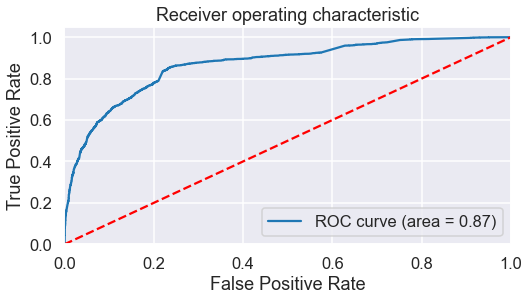

In [ ]:
# Calling the roc curve function for plotting

edu_roc(z_train_pred_final2.Converted, z_train_pred_final2.Converted_probability)

Points to be concluded from above roc curve -

we can see here that The curve is closer to the left side of the border than to the right side hence our model is having great accuracy.
The area under the curve is 87% of the total area.

# Conclusion from RFE Test - 1 & Test - 2

Important points to be drawn from both tests -

For Test - 1, we saw that the auc score is 0.88 in ROC curve plot.
For Test - 2, we saw that the auc score is 0.87 in ROC curve plot.
As we all know that AUC measures how true postive rates and false positive rates trade-off. It tells us the model stability. The larger the area, more our model will be able to distinguish classes. Ex - For this case converted or not Which means the model created by RFE test - 1 is the better model or stable model than 2.

In [ ]:
# Scalling the variables 'Total Time Spent on Website' with standard scaler and tranforming the X - test dataset

P_test[['Total Time Spent on Website']]=scaler.transform(P_test[['Total Time Spent on Website']])

In [ ]:
# Predicting the test dataset with our final model

test_cols=P_train_4.columns[1:]              # Taking the same column train set has
P_test_final=P_test[test_cols]               # Updating it in the final test set
P_test_final=sm.add_constant(P_test_final)   # Adding constant to the final set set
z_pred_test=reg3.predict(P_test_final)       # Predicting the final test set

In [ ]:
# Creating a new dataset and saving the prediction values in it

z_test_pred_final=pd.DataFrame({'Converted':z_test.values,'Converted_Probability':z_pred_test,'ID':P_test.index})

z_test_pred_final.head()   # viewing first 5 rows

,Converted,Converted_Probability,ID
4269,1,0.650203,4269
2376,1,0.899467,2376
7766,1,0.735555,7766
9199,0,0.072559,9199
4359,1,0.672628,4359


# evaluation of model

In [ ]:
# Predicting the outcomes with probability cutoff as 0.4 by creating new columns in the final test dataset

z_test_pred_final['Predicted']=z_test_pred_final['Converted_Probability'].map(lambda x:1 if x >0.4 else 0 )  # Predicted value 

z_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted
4269,1,0.650203,4269,1
2376,1,0.899467,2376,1
7766,1,0.735555,7766,1
9199,0,0.072559,9199,0
4359,1,0.672628,4359,1


In [ ]:
#now we are checking the accuracy of test data set
# Checking the accuracy of the test dataset.

from sklearn import metrics    # Imprting metrics from sklearn

print('Accuracy score in predicting test dataset :',metrics.accuracy_score(z_test_pred_final.Converted, z_test_pred_final.Predicted))   # Printing the score

Accuracy score in predicting test dataset : 0.8152958152958153


In [ ]:
from sklearn.metrics import precision_score, recall_score     # Importing precision and recall score from sklearn

print('Precision score in predicting test dataset:',precision_score(z_test_pred_final.Converted, z_test_pred_final.Predicted))   # Printing the precision score

print('Recall score in predicting test dataset:',recall_score(z_test_pred_final.Converted, z_test_pred_final.Predicted))      # Printing the recall score

Precision score in predicting test dataset: 0.7541412380122058
Recall score in predicting test dataset: 0.7899543378995434


# assigning the lead score

In [ ]:
#now we are creating new columns for lead and lead score
z_test_pred_final['Lead Number']=edu_inp.iloc[z_test_pred_final['ID'],1]

z_test_pred_final['Lead Score']=z_test_pred_final['Converted_Probability'].apply(lambda x:round(x*100))


z_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted,Lead Number,Lead Score
4269,1,0.650203,4269,1,619003,65
2376,1,0.899467,2376,1,636884,90
7766,1,0.735555,7766,1,590281,74
9199,0,0.072559,9199,0,579892,7
4359,1,0.672628,4359,1,617929,67


# concluding the above 

THE INSIGHTS WE GOT ABOVE LIKE THE ACCURACY , PRECISION AND RECALL SCORE FROM THE TEST SET ARE IN ACCEPTABLE RANGE

THE RECALL SCORE IS HIGHER THAN PRECISION SCORE

THIS MODEL CAN ADJUST WITH ORGANISATION REQUIREMENT IN COMING FUTURE